# Step 1:EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1)

### Loading and Viewing the Data

In [3]:
# Reading the files
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
# Checking the shapes of the files loaded
train.shape

(200000, 202)

In [5]:
test.shape

(200000, 201)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [8]:
# data types and df shape
print('Here are the data types:\n' + str(train.dtypes) + '\n')

Here are the data types:
ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object



### Checking for Missing Values

In [9]:
# Checking for missing values
train.isna().sum().sum()

0

In [10]:
test.isna().sum().sum()

0

We find no missing values

In [11]:
# putting all the df colname in a list
dfcols = list(train.columns)

# exculdig target and index columns
variables = dfcols[2:]
target = dfcols[1]

### Checking the balance of the dataset target

In [12]:
target_count = train['target'].value_counts()
target_count

0    179902
1     20098
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

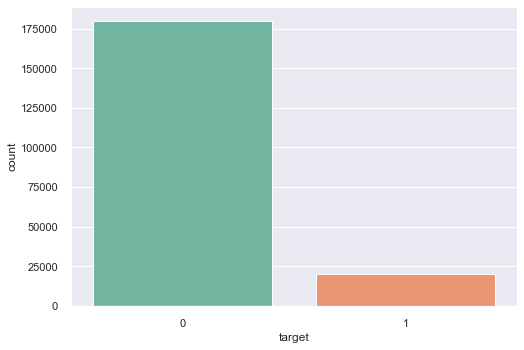

In [13]:
# sns.set_theme(style="darkgrid")
sns.countplot(x='target', data = train,palette="Set2")

In [14]:
# Is the dataset balanced
mylst = list(train["target"].value_counts())
zeroes = round(float((mylst[0]/sum(mylst))*100),2)
ones = round(float((mylst[1]/sum(mylst))*100),2)
print('The dataset has {zero} % of target 0 and {one} % of target 1'.format(zero=zeroes, one=ones))

The dataset has 89.95 % of target 0 and 10.05 % of target 1


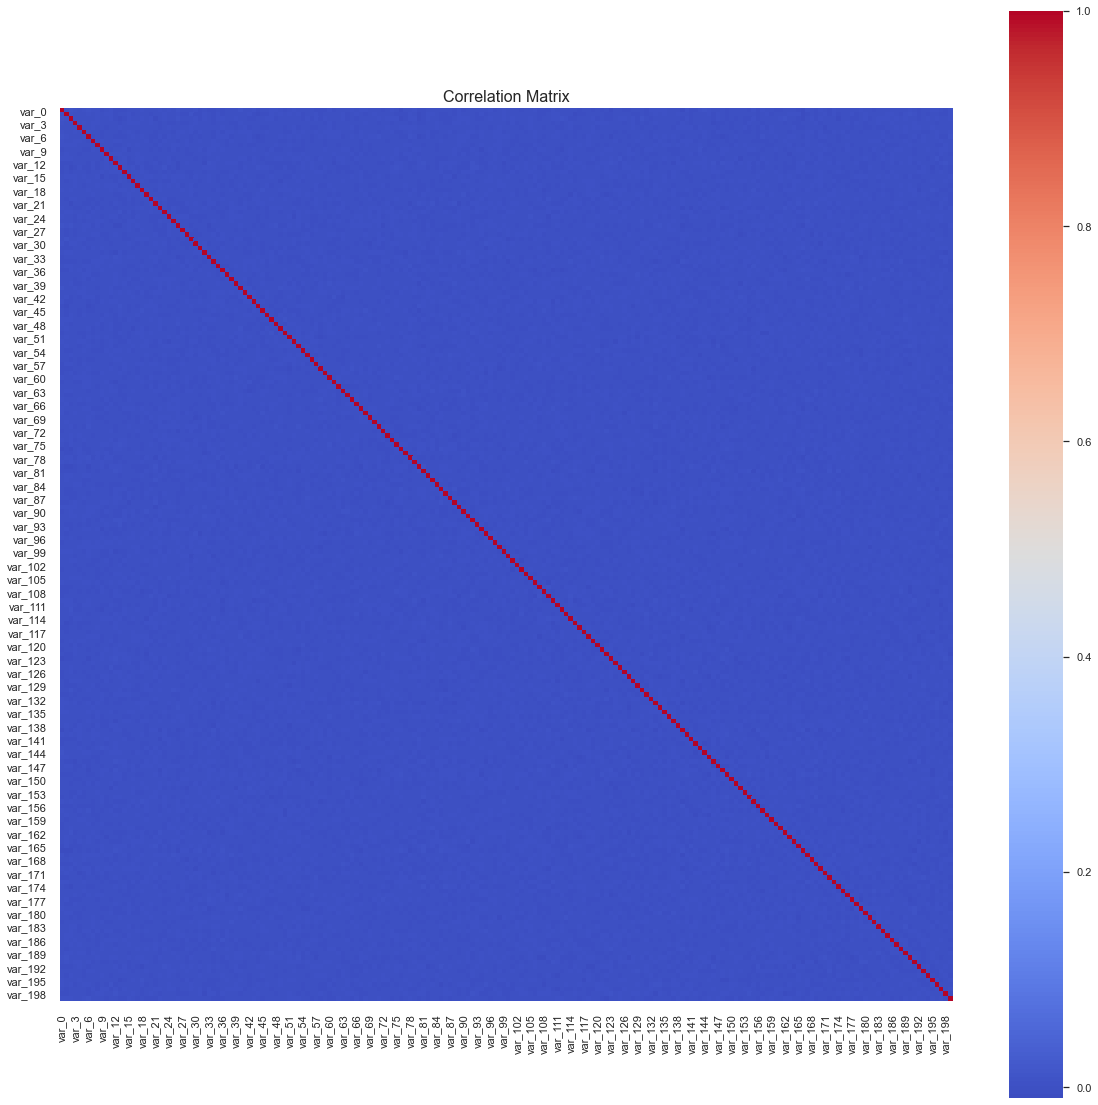

In [15]:
train_corr = train[variables].corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_corr, cbar=True, cmap="coolwarm",square=True,ax=ax)
plt.title("Correlation Matrix", fontsize=16,)
plt.show()

In [16]:
# choose a threshold to spot correlation above its abs()
# try 0.08 or 0.05 to have some results, even though is not a relevant correlation 
threshold = 0.1
dfcorr = train[variables].corr()
dfcorr[abs(dfcorr) < threshold] = None
dfcorr[abs(dfcorr) >= threshold] = 1

In [17]:
cor = dfcorr.sum(axis=1) > 1
# Listing the variables that is worth investigating on
var_to_check = list(cor[cor.values == True].index)

if len(var_to_check) > 0:
    print('These are the variables with correlations >= {}:'.format(threshold))
    print(str(var_to_check) + '\n')
    for i in var_to_check:
        print(str(dfcorr[(abs(dfcorr[i]) >= threshold) & (abs(dfcorr[i]) != 1)][i]) + '\n')
else:
    print('There are no significant correlations to look!')

There are no significant correlations to look!


As we can see, all correlations are lesser than 1%

### Checking for Duplicates

In [18]:
# Check for duplicates on both train and test datasets
train.loc[:,'var_0':].duplicated().sum()

0

In [19]:
test.loc[:,'var_0':].duplicated().sum()

0

### Understanding the unique values

In [20]:
# Define Features
feature = [col for col in train.columns if col not in ['ID_code', 'target']]

In [21]:
# Split features and labels
train_X = train[feature]
test_X = test[feature]
y = train['target']

In [24]:
train_unique = train_X.nunique()
test_unique = test_X.nunique()
train_unique_0 = train_X[train['target']==0].nunique()
train_unique_1 = train_X[train['target']==1].nunique()

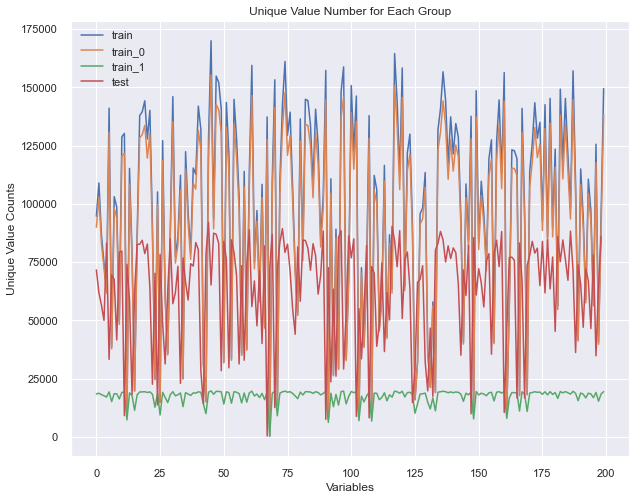

In [25]:
plt.figure(figsize=(10,8))
plt.title("Unique Value Number for Each Group")
plt.xlabel("Variables")
plt.ylabel("Unique Value Counts")
plt.plot(train_unique.values, label = 'train')
plt.plot(train_unique_0.values, label = 'train_0')
plt.plot(train_unique_1.values, label = 'train_1')
plt.plot(test_unique.values[1:],label = 'test')
plt.legend()